In [1]:
import numpy as np 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from os import getcwd
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

In [2]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


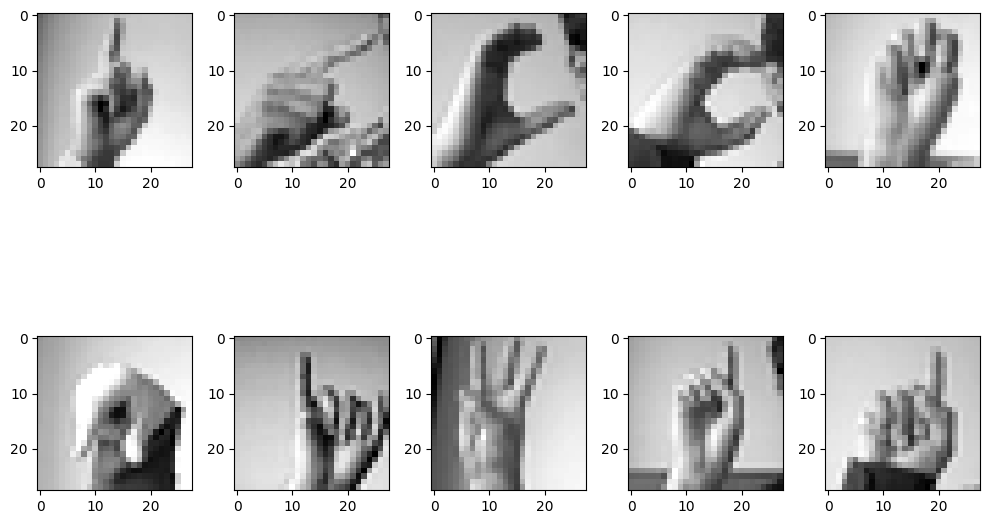

In [3]:
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
print(training_images.shape)
print(testing_images.shape)
    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=5,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/5


C:\Users\Prasanna\AppData\Local\Temp\ipykernel_48988\3408847250.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


857/857 [==============================] - 22s 23ms/step - loss: 2.6469 - accuracy: 0.1918 - val_loss: 1.8410 - val_accuracy: 0.3857
Epoch 2/5
857/857 [==============================] - 20s 23ms/step - loss: 1.9002 - accuracy: 0.3872 - val_loss: 1.2098 - val_accuracy: 0.5809
Epoch 3/5
857/857 [==============================] - 19s 22ms/step - loss: 1.4883 - accuracy: 0.5123 - val_loss: 0.9260 - val_accuracy: 0.6792
Epoch 4/5
857/857 [==============================] - 19s 23ms/step - loss: 1.2380 - accuracy: 0.5932 - val_loss: 0.6937 - val_accuracy: 0.7678
Epoch 5/5
857/857 [==============================] - 20s 23ms/step - loss: 1.0522 - accuracy: 0.6516 - val_loss: 0.7260 - val_accuracy: 0.7440


[223.36766052246094, 0.5697155594825745]

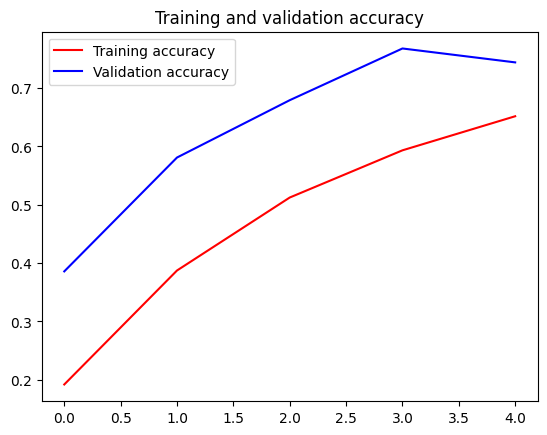

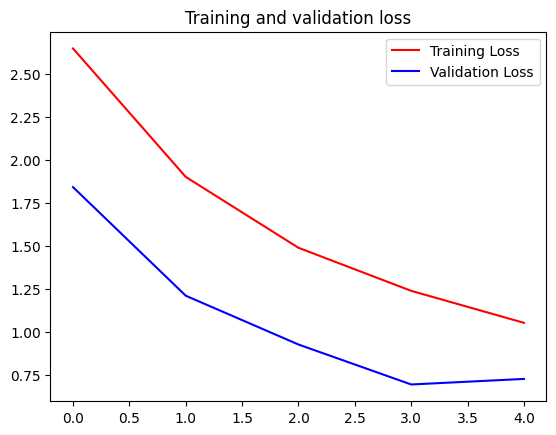

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

225/225 [==============================] - 1s 5ms/step


c:\Users\Prasanna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prasanna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prasanna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

              precision    recall  f1-score   support

     Class 0       0.43      0.90      0.58       331
     Class 1       1.00      0.20      0.34       432
     Class 2       0.99      0.92      0.95       310
     Class 3       1.00      0.00      0.01       245
     Class 4       0.63      0.05      0.09       498
     Class 5       0.57      0.97      0.71       247
     Class 6       0.70      0.50      0.58       348
     Class 7       1.00      0.70      0.82       436
     Class 8       0.38      0.97      0.55       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.05      0.02      0.03       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

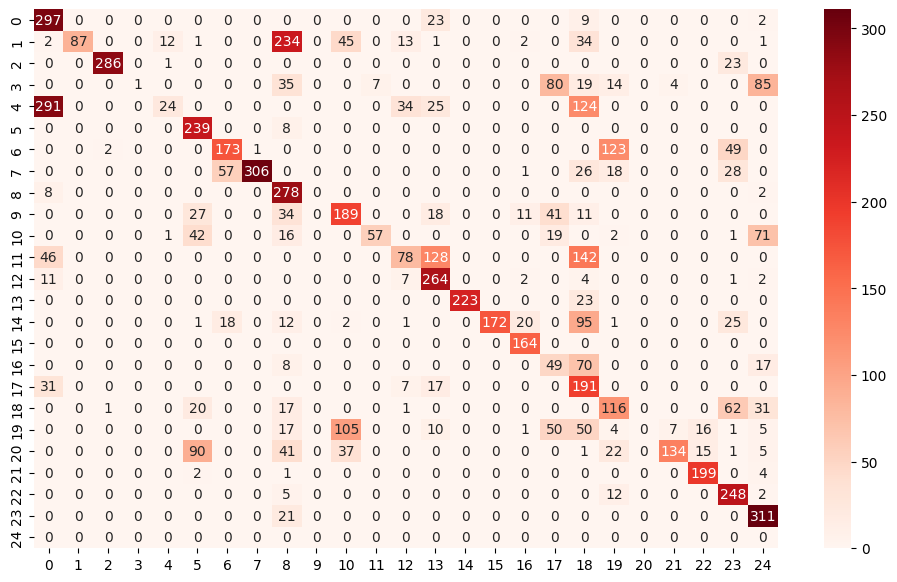

In [7]:
predictions = np.argmax(model.predict(testing_images), axis=-1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,fmt='')

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(training_images, training_labels, batch_size=32,
                    epochs=5, validation_data=(testing_images, testing_labels))

model.evaluate(testing_images, testing_labels, verbose=0)


Epoch 1/5
858/858 [==============================] - 4s 4ms/step - loss: 11.1807 - accuracy: 0.0516 - val_loss: 3.2227 - val_accuracy: 0.0212
Epoch 2/5
858/858 [==============================] - 3s 3ms/step - loss: 3.2026 - accuracy: 0.0476 - val_loss: 3.2121 - val_accuracy: 0.0227
Epoch 3/5
858/858 [==============================] - 3s 3ms/step - loss: 3.1906 - accuracy: 0.0481 - val_loss: 3.2094 - val_accuracy: 0.0205
Epoch 4/5
858/858 [==============================] - 3s 3ms/step - loss: 3.1845 - accuracy: 0.0475 - val_loss: 3.2267 - val_accuracy: 0.0201
Epoch 5/5
858/858 [==============================] - 3s 3ms/step - loss: 3.1823 - accuracy: 0.0472 - val_loss: 3.2067 - val_accuracy: 0.0201


[3.2067482471466064, 0.020078081637620926]

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32))

# Evaluate the Model
model.evaluate(testing_images, testing_labels, verbose=0)


Epoch 1/15
858/858 [==============================] - 65s 72ms/step - loss: 2.7214 - accuracy: 0.2411 - val_loss: 1.9539 - val_accuracy: 0.4165
Epoch 2/15
858/858 [==============================] - 64s 75ms/step - loss: 1.5861 - accuracy: 0.4815 - val_loss: 0.6503 - val_accuracy: 0.7989
Epoch 3/15
858/858 [==============================] - 64s 75ms/step - loss: 1.1997 - accuracy: 0.5979 - val_loss: 0.7879 - val_accuracy: 0.7327
Epoch 4/15
858/858 [==============================] - 64s 74ms/step - loss: 0.9853 - accuracy: 0.6633 - val_loss: 0.3887 - val_accuracy: 0.8723
Epoch 5/15
858/858 [==============================] - 67s 78ms/step - loss: 0.8691 - accuracy: 0.7042 - val_loss: 0.3091 - val_accuracy: 0.9011
Epoch 6/15
858/858 [==============================] - 65s 76ms/step - loss: 0.8011 - accuracy: 0.7303 - val_loss: 0.3582 - val_accuracy: 0.8787
Epoch 7/15
858/858 [==============================] - 64s 75ms/step - loss: 0.7041 - accuracy: 0.7591 - val_loss: 0.3560 - val_accuracy: